# LPC Tutoring Center Student Churn Analysis

This dataset, F19_Dataset contains student usage data from the Las Positas college tutoring center from Fall 2019 to April of Spring 2020 where each visit captures student input information such as time, date, subject, time spent studying or tutoring.

Tableau Prep Builder (an ETL tool) was used for data cleaning and transformation (data validation, null value removal and transformation, feature engineering, creating bins, and other data procedures), allowing the LPC tutoring center staff to transform data with ease for future analysis.

The following Python code consists of Exploratory Data analysis and Predictive model building.

In [2]:
# Importing liberaries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the Fall LPC Student Dataset as the data frame named F19_Dataset

F19_Dataset = pd.read_csv('F19_Dataset.csv')

In [4]:
# Inspection of first five rows of F23_Dataset

F19_Dataset.head()

,ID,Churn,Dur_Lvl,Vis_Enge_Lvl,Num Ser Usd,Tut_Vis_Cnt,Stdy_Vis_Cnt,Dule_Ser_User,MAX VIS CNT,Max_Vis_Cat,Sng_Ser_User,Avg_Days_Betw_Cat,Avg_Visit_Timing
0,lq3vlzx3,Yes,D3,Middle,1,0,1,No,1,0-10,Yes,0-9,Afternoon
1,lq3xezzR,No,D3,Late,1,0,7,No,7,0-10,Yes,0-9,Morning
2,lq3xeq3N,No,D2,Earily,1,0,5,No,5,0-10,Yes,10-20,Afternoon
3,lq3eRsqR,No,D3,Earily,2,2,7,Yes,9,0-10,No,0-9,Morning
4,lq3zxqvl,No,D3,Middle,1,0,2,No,2,0-10,Yes,21-30,Morning


In [5]:
# Inspecting data shape, columns and rows, and the related data types

F19_Dataset.shape

F19_Dataset.dtypes

ID                   object
Churn                object
Dur_Lvl              object
Vis_Enge_Lvl         object
Num Ser Usd           int64
Tut_Vis_Cnt           int64
Stdy_Vis_Cnt          int64
Dule_Ser_User        object
MAX VIS CNT           int64
Max_Vis_Cat          object
Sng_Ser_User         object
Avg_Days_Betw_Cat    object
Avg_Visit_Timing     object
dtype: object

In [6]:
# Descriptive statistics and trends of numerical features

F19_Dataset.describe()

,Num Ser Usd,Tut_Vis_Cnt,Stdy_Vis_Cnt,MAX VIS CNT
count,2140.000000,2140.000000,2140.000000,2140.000000
mean,1.348598,2.136916,4.149065,6.285981
std,0.476638,4.272228,8.382830,9.832277
min,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,3.000000
75%,2.000000,2.000000,4.000000,7.000000
max,2.000000,51.000000,113.000000,121.000000


Total of 2140 individual records of different student engagement trends

75th percentile shows insightful trends where those students are using 2 services (being studying and tutoring), receiving tutoring at least twice and studying at the tutoring center about four times within a semester

25th and 50th percentiles displays students on average have lower and different engagement trends with the tutoring center with mainly only one service being used and much lower total visits to the tutoring center within a semester time window (nearly half of the max visit count with respect to the 75th percentile) 

The max, min, and std rows indicate there is a lot of variability in the data, some students are very active when it comes to engaging with the center with up to 121 total visits and others not as much with some only visiting once.

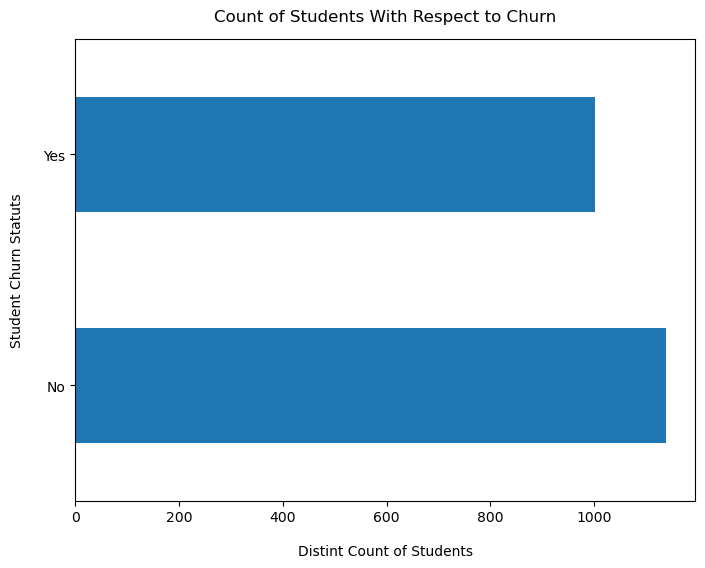

In [7]:
# Ploting total "Churners" those stduents who either only visited the tutoring center once,
# or failed to return within 30 days of any pervious visit within a semester time window, 

F19_Dataset['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Distint Count of Students", labelpad=14)
plt.ylabel("Student Churn Statuts", labelpad=14)
plt.title("Count of Students With Respect to Churn", y=1.02);

In [8]:
# Exact Pct of Churn raito for dataset

100*F19_Dataset['Churn'].value_counts()/len(F19_Dataset['Churn'])

No     53.17757
Yes    46.82243
Name: Churn, dtype: float64

In [9]:
# xact value counts with respect to churners

F19_Dataset['Churn'].value_counts()

No     1138
Yes    1002
Name: Churn, dtype: int64

# Additional Data Cleaning Procedures

In [10]:
# Gathering insight related to null object

F19_Dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2140 non-null   object
 1   Churn              2140 non-null   object
 2   Dur_Lvl            2140 non-null   object
 3   Vis_Enge_Lvl       2140 non-null   object
 4   Num Ser Usd        2140 non-null   int64 
 5   Tut_Vis_Cnt        2140 non-null   int64 
 6   Stdy_Vis_Cnt       2140 non-null   int64 
 7   Dule_Ser_User      2140 non-null   object
 8   MAX VIS CNT        2140 non-null   int64 
 9   Max_Vis_Cat        2140 non-null   object
 10  Sng_Ser_User       2140 non-null   object
 11  Avg_Days_Betw_Cat  2140 non-null   object
 12  Avg_Visit_Timing   2140 non-null   object
dtypes: int64(4), object(9)
memory usage: 217.5+ KB


C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


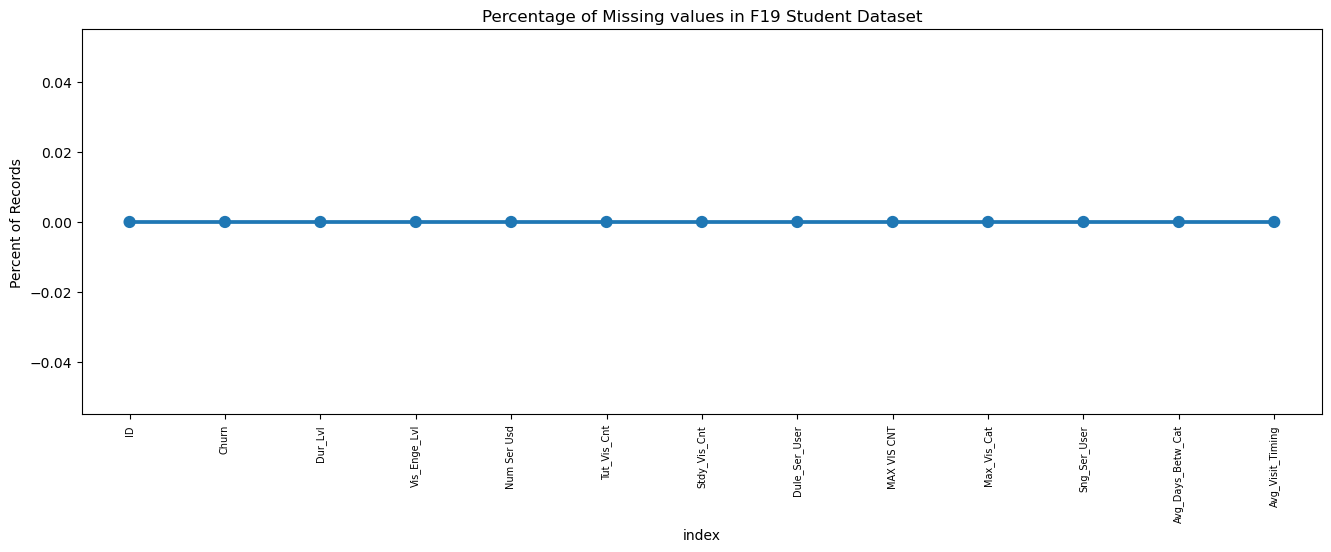

In [11]:
# Visual for null object identification by feature category

missing = pd.DataFrame((F19_Dataset.isnull().sum())*100/F19_Dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in F19 Student Dataset")
plt.ylabel("Percent of Records")
plt.show()

In [12]:
# Creating a copy of the dataset for EDA and further
# keeping base dataset the same if it is needed later

F19_Data = F19_Dataset.copy()

# Univariate Exploratory Data Analysis

In [14]:
# Drop column ID as all rows are distinct and there are no null values so these values are not needed for visuals
F19_Data.drop(columns= ['ID'], axis=1, inplace=True)
F19_Data.head()

,Churn,Dur_Lvl,Vis_Enge_Lvl,Num Ser Usd,Tut_Vis_Cnt,Stdy_Vis_Cnt,Dule_Ser_User,MAX VIS CNT,Max_Vis_Cat,Sng_Ser_User,Avg_Days_Betw_Cat,Avg_Visit_Timing
0,Yes,D3,Middle,1,0,1,No,1,0-10,Yes,0-9,Afternoon
1,No,D3,Late,1,0,7,No,7,0-10,Yes,0-9,Morning
2,No,D2,Earily,1,0,5,No,5,0-10,Yes,10-20,Afternoon
3,No,D3,Earily,2,2,7,Yes,9,0-10,No,0-9,Morning
4,No,D3,Middle,1,0,2,No,2,0-10,Yes,21-30,Morning


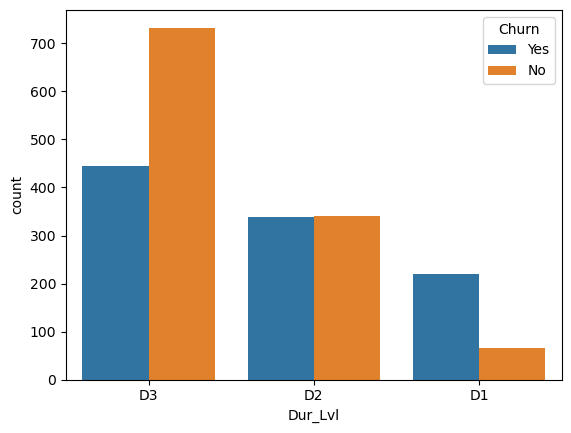

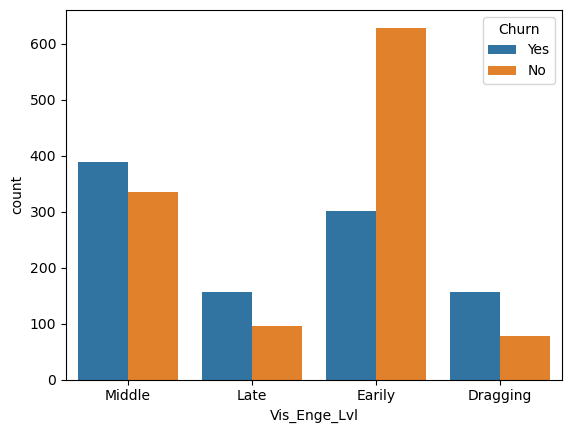

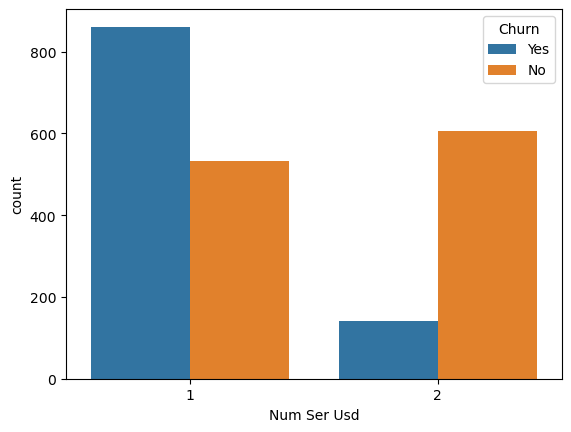

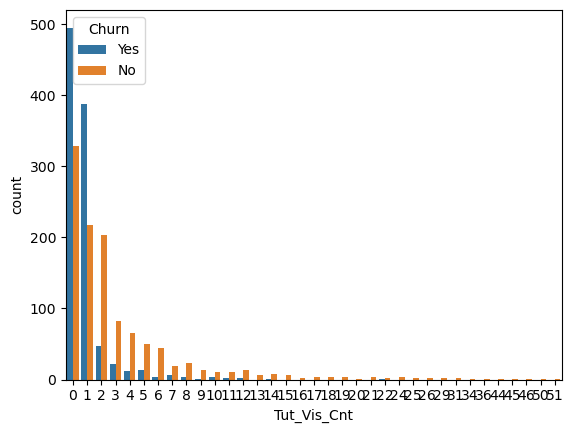

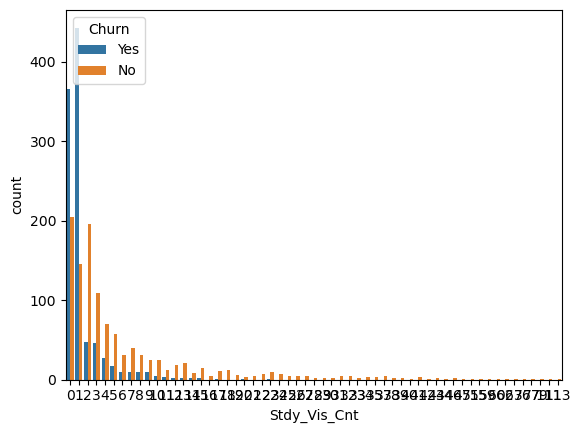

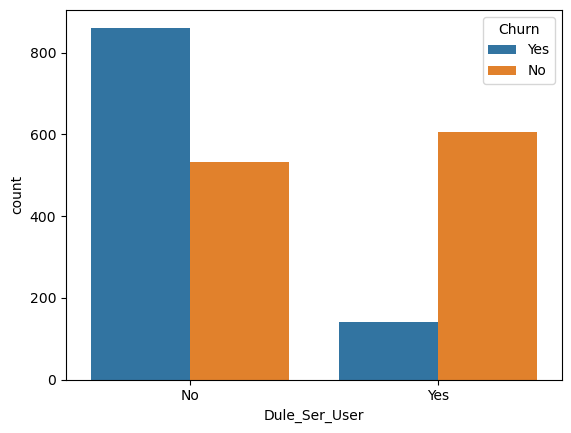

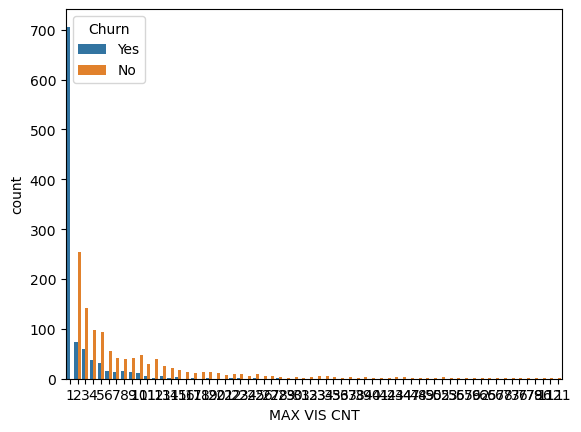

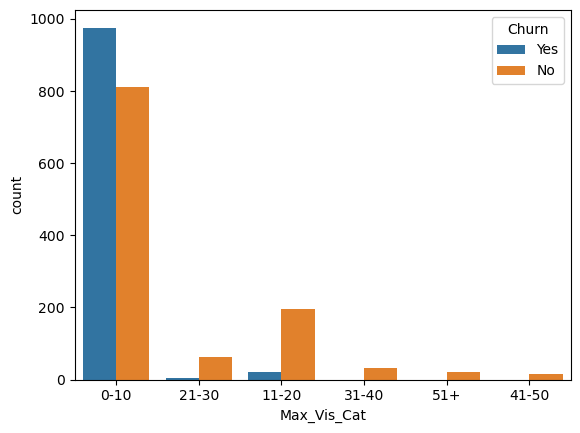

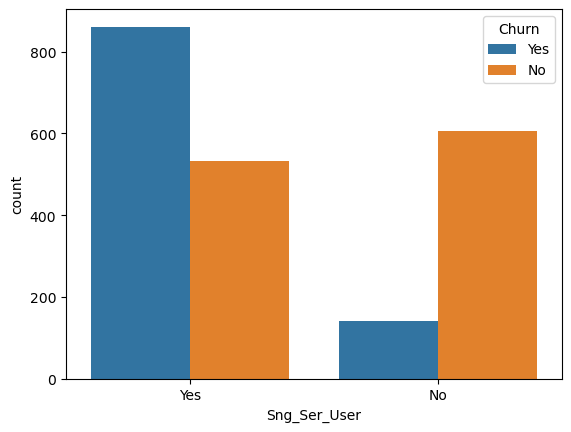

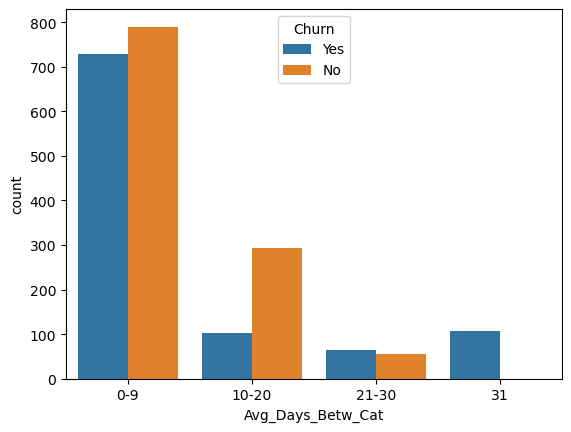

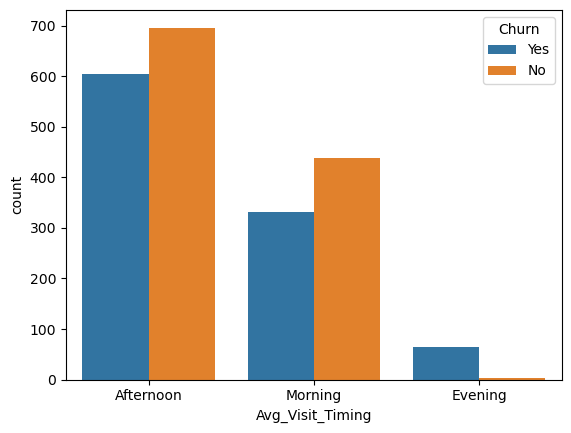

In [15]:
# For loop uses seaborn countplot function to display the distribution of all different feature bins and categories 
# with respect to churn counts

for i, predictor in enumerate(F19_Data.drop(columns=['Churn'])):
    plt.figure(i)
    sns.countplot(data=F19_Data, x=predictor, hue='Churn')

Univariate EDA insights:

Duration level display an inverse churn rate decreases as visit duration increases

Earlier visit engagement levels within the semester specifically within weeks 1-4 (Early) and weeks 5-8 (Middle) see less churn

Number of services used, being tutoring and studying, when students are using both services they tend to churn less an average

With respect to total visits, tutoring visits and studying visits, there is an inverse correlation as students visit more, churn rates decrease; Specifically, once students visit twice for any service far fewer tend to churn.

When considering average days in between visits, it is evident that once the days in between visits exceed 20, churn is higher. Additionally, students visiting in the afternoon and morning times are less likely to churn. 

It is clear that on average there exists trends that align with certain behaviors or habits that would increase the likelihood of students using the tutoring center more often and more consistently. Overall, duration, the timing both within the semester and during the day that students engage with the tutoring center, the number of services students are interacting with, the days in between visits, and the total maximum visits are all metrics that have a correlation with churn behavior. These are avenues for KPI implementation and can give insight as to where efforts and how efforts can be put to lessen churn. 

In [16]:
# Converting churn to a binary nmumerial value

F19_Data['Churn'] = np.where(F19_Data.Churn == 'Yes',1,0)

F19_Data.head()

,Churn,Dur_Lvl,Vis_Enge_Lvl,Num Ser Usd,Tut_Vis_Cnt,Stdy_Vis_Cnt,Dule_Ser_User,MAX VIS CNT,Max_Vis_Cat,Sng_Ser_User,Avg_Days_Betw_Cat,Avg_Visit_Timing
0,1,D3,Middle,1,0,1,No,1,0-10,Yes,0-9,Afternoon
1,0,D3,Late,1,0,7,No,7,0-10,Yes,0-9,Morning
2,0,D2,Earily,1,0,5,No,5,0-10,Yes,10-20,Afternoon
3,0,D3,Earily,2,2,7,Yes,9,0-10,No,0-9,Morning
4,0,D3,Middle,1,0,2,No,2,0-10,Yes,21-30,Morning


In [17]:
# Converting categorical variables to "dummy" Variables, lable encoding target varibles
# By converting our target variables to numerical values, the data will be better suited for model building later on     

F19_Data_dummies = pd.get_dummies(F19_Data)
F19_Data_dummies.head()

,Churn,Num Ser Usd,Tut_Vis_Cnt,Stdy_Vis_Cnt,MAX VIS CNT,Dur_Lvl_D1,Dur_Lvl_D2,Dur_Lvl_D3,Vis_Enge_Lvl_Dragging,Vis_Enge_Lvl_Earily,...,Max_Vis_Cat_51+,Sng_Ser_User_No,Sng_Ser_User_Yes,Avg_Days_Betw_Cat_0-9,Avg_Days_Betw_Cat_10-20,Avg_Days_Betw_Cat_21-30,Avg_Days_Betw_Cat_31,Avg_Visit_Timing_Afternoon,Avg_Visit_Timing_Evening,Avg_Visit_Timing_Morning
0,1,1,0,1,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,0,1,0,7,7,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,1,0,5,5,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,0,2,2,7,9,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
4,0,1,0,2,2,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


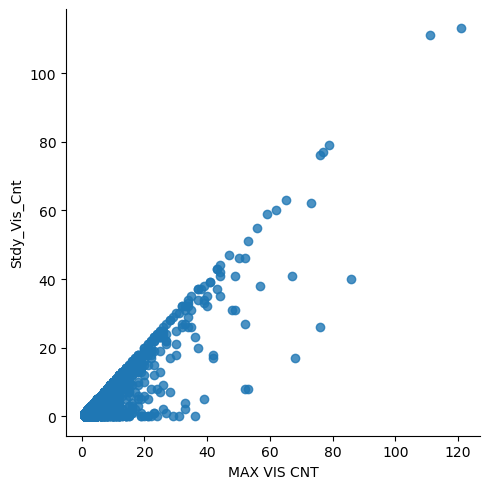

In [18]:
# Inspecting for a possible Relationship between student maximum visits and that count of total study visits

sns.lmplot(data=F19_Data_dummies, x='MAX VIS CNT', y='Stdy_Vis_Cnt', fit_reg=False)

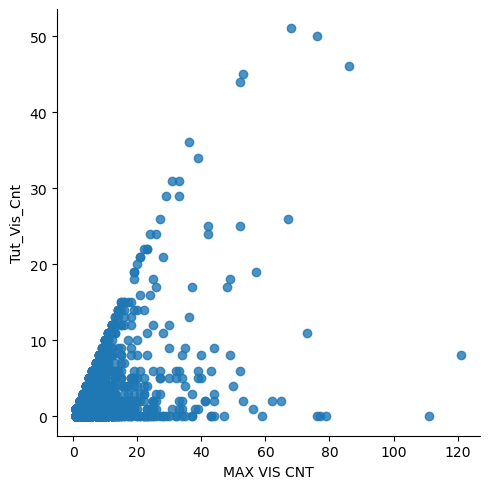

In [19]:
# Inspecting for a possible Relationship between student maximum visits and that count of total tutoring visits

sns.lmplot(data=F19_Data_dummies, x='MAX VIS CNT', y='Tut_Vis_Cnt', fit_reg=False)

As expected Maximum Visit counts are positivly correlated with visits for studying and tutoring

Not as clear of a correlation with study and tutoring visits tested aginst one another below

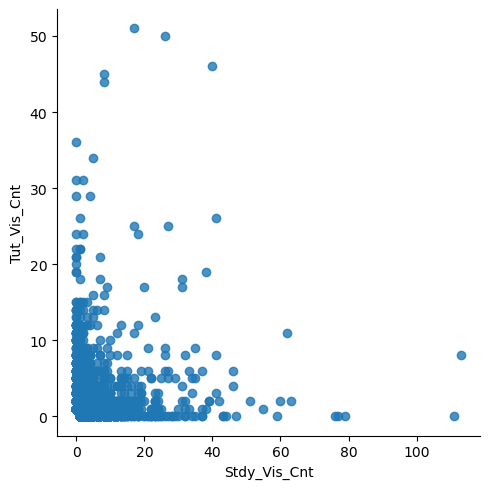

In [20]:
#Relationship between Stdy_Vis_Cnt and Tut_Vis_Cnt

sns.lmplot(data=F19_Data_dummies, x='Stdy_Vis_Cnt', y='Tut_Vis_Cnt', fit_reg=False)

Text(0.5, 1.0, 'Max Visits by churn')

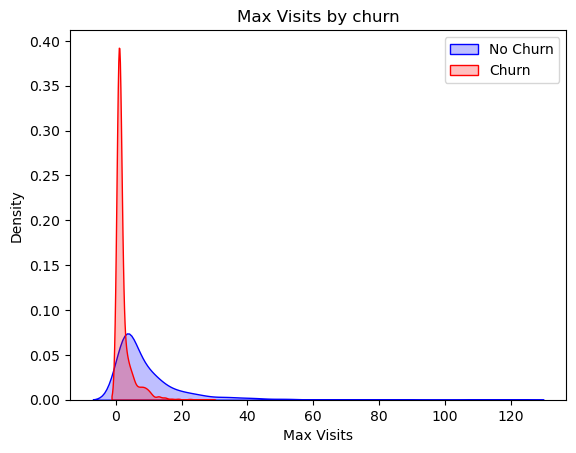

In [19]:
# Churn density charted against student maximum visit counts

Mvc = sns.kdeplot(F19_Data_dummies['MAX VIS CNT'][(F19_Data_dummies["Churn"] == 0) ],
                color="Blue", shade = True)
Mvc = sns.kdeplot(F19_Data_dummies['MAX VIS CNT'][(F19_Data_dummies["Churn"] == 1) ],
                ax =Mvc, color="Red", shade= True)
Mvc.legend(["No Churn","Churn"],loc='upper right')
Mvc.set_ylabel('Density')
Mvc.set_xlabel('Max Visits')
Mvc.set_title('Max Visits by churn')

Text(0.5, 1.0, 'Total Studying Visits by churn')

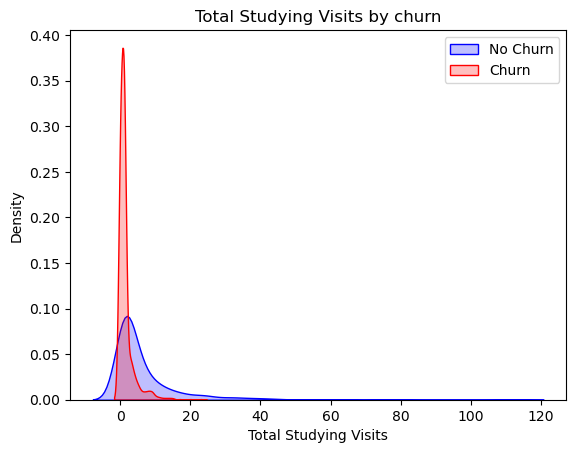

In [20]:
# Churn density charted against student maximum study visit counts

Stdy = sns.kdeplot(F19_Data_dummies.Stdy_Vis_Cnt[(F19_Data_dummies["Churn"] == 0) ],
                color="Blue", shade = True)
Stdy = sns.kdeplot(F19_Data_dummies.Stdy_Vis_Cnt[(F19_Data_dummies["Churn"] == 1) ],
                ax =Stdy, color="Red", shade= True)
Stdy.legend(["No Churn","Churn"],loc='upper right')
Stdy.set_ylabel('Density')
Stdy.set_xlabel('Total Studying Visits')
Stdy.set_title('Total Studying Visits by churn')

Text(0.5, 1.0, 'Total Tutoring Visits by churn')

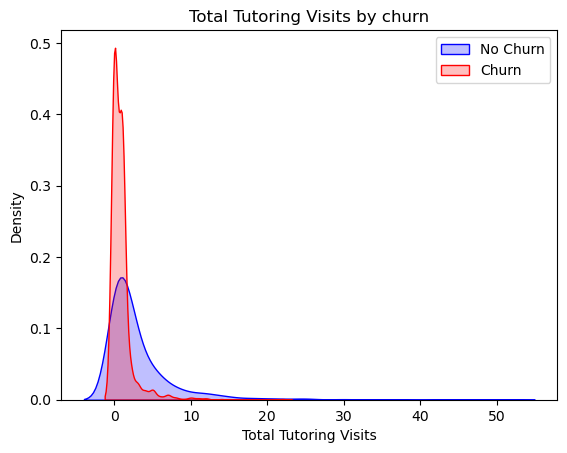

In [21]:
# Churn density charted against student maximum tutoring visit counts

Tut = sns.kdeplot(F19_Data_dummies.Tut_Vis_Cnt[(F19_Data_dummies["Churn"] == 0) ],
                color="Blue", shade = True)
Tut = sns.kdeplot(F19_Data_dummies.Tut_Vis_Cnt[(F19_Data_dummies["Churn"] == 1) ],
                ax =Tut, color="Red", shade= True)
Tut.legend(["No Churn","Churn"],loc='upper right')
Tut.set_ylabel('Density')
Tut.set_xlabel('Total Tutoring Visits')
Tut.set_title('Total Tutoring Visits by churn')

Churn denisty, as seen in univariate EDA, is lower when engadgement with the tutoring cneter is higher with respect to services

<AxesSubplot:>

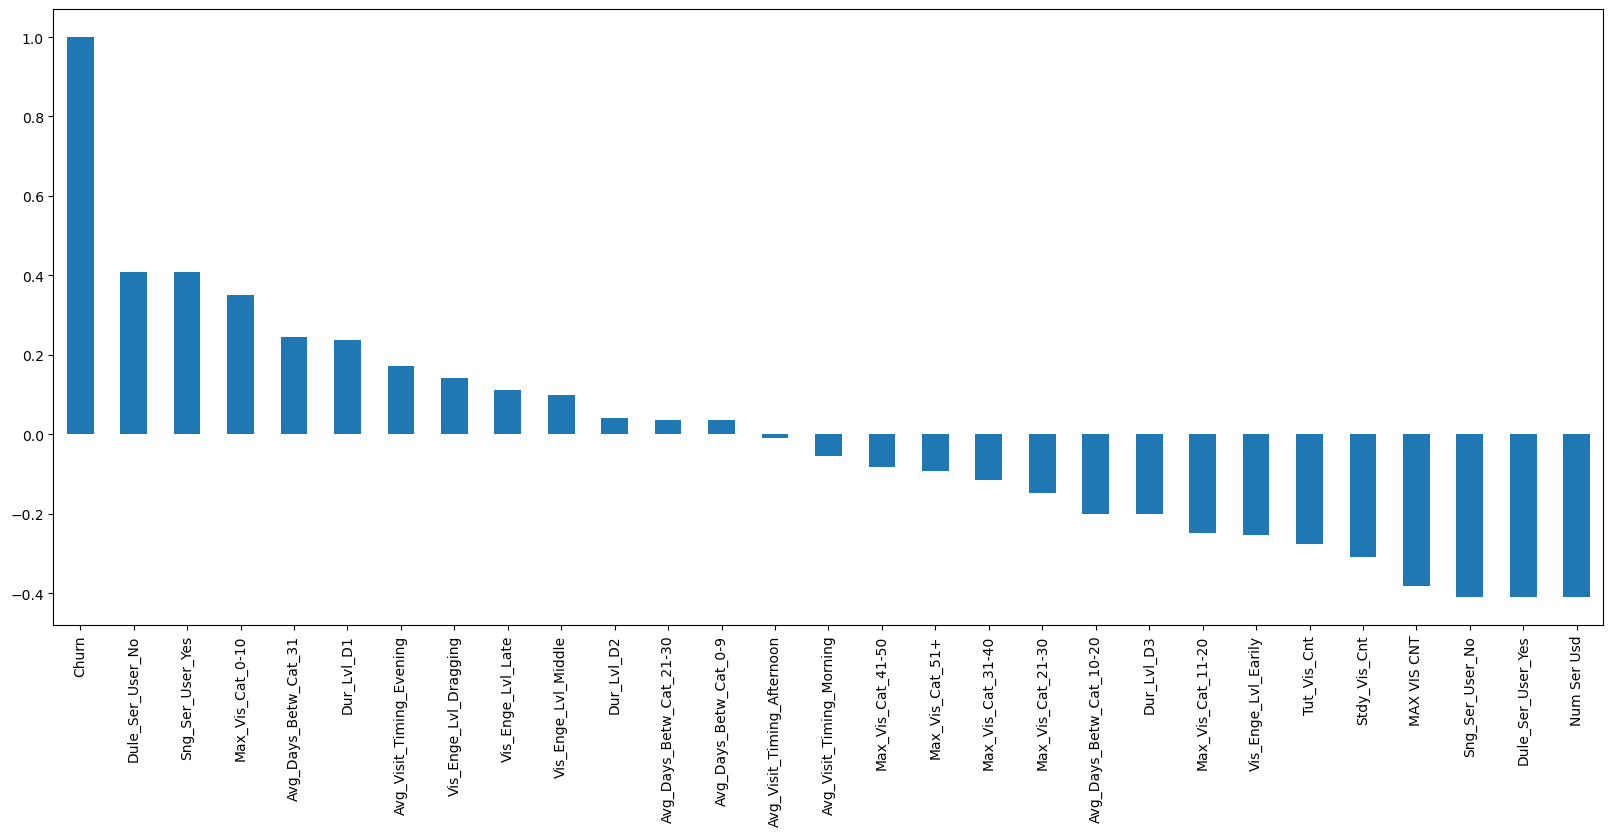

In [22]:
# Correlation Values by feature category with pairwise correlation values with respect to churn

plt.figure(figsize=(20,8))
F19_Data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Features of correlation closely resemble those identified with EDA univariate analysis
this allows for specific categories within features of significance to be isolated and scored

<AxesSubplot:>

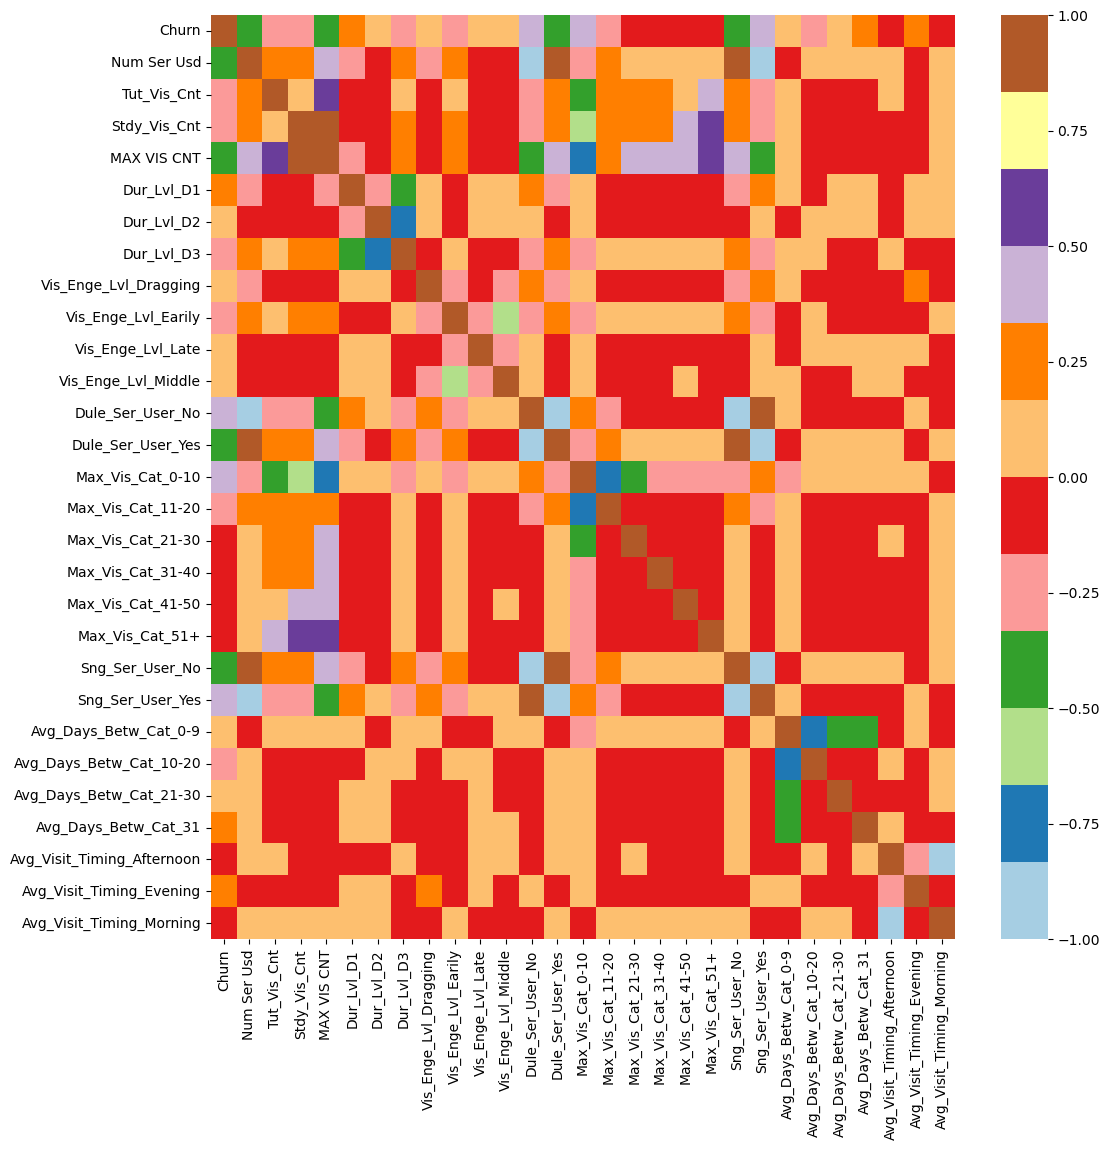

In [23]:
# Correlaiton heatmap by feature

plt.figure(figsize=(12,12))
sns.heatmap(F19_Data_dummies.corr(), cmap="Paired")

Features with the highest correlation when weighed against one another allows for a granular assessment, category by category, of relevant relationships of correlation. Of the most correlated are relationships between number of services used and engagement levels.  

# Bivariate Exploratory Data Analysis

In [24]:
# Splitting up original df by churn values creating two separate cohorts of students, those who have churned (1) 
# and have not churned (0)

df1_target0=F19_Data.loc[F19_Data["Churn"]==0]
df1_target1=F19_Data.loc[F19_Data["Churn"]==1]

In [27]:
# ChurnPlot function accepts 4 parameters being: the selected data frame, column of data frame, title of the
# chart, and the hue which is the count of the specified feature based on the distribution of the selected column
# Lastly, seaborn .countplot() is used to plot the distributions where counts of columns are churners


def ChurnPlot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

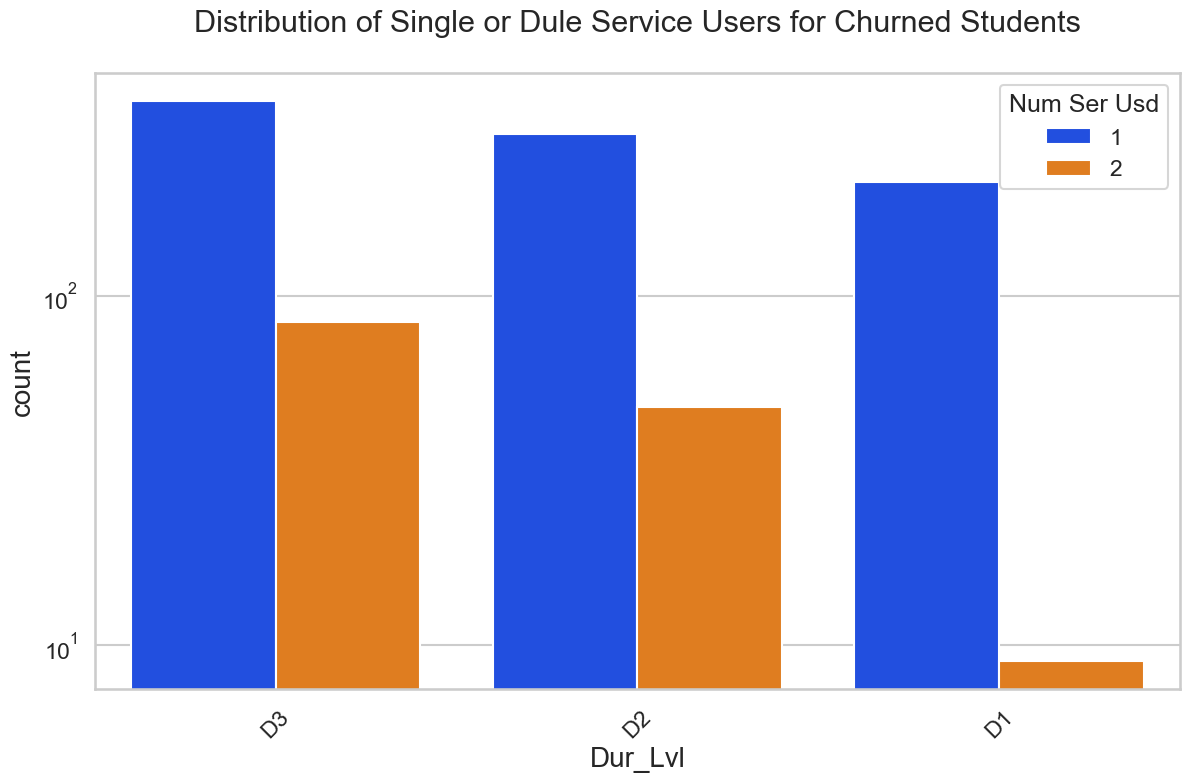

In [28]:
# Bivariate churn analysis of Dur Lvl distribution WRT Num Ser Usd

ChurnPlot(df1_target1,col='Dur_Lvl',title='Distribution of Single or Dule Service Users for Churned Students',hue='Num Ser Usd')

More people are using one service than two within all duration levels but despite duration levels,
all those who only used one service churn at nearly the same rate


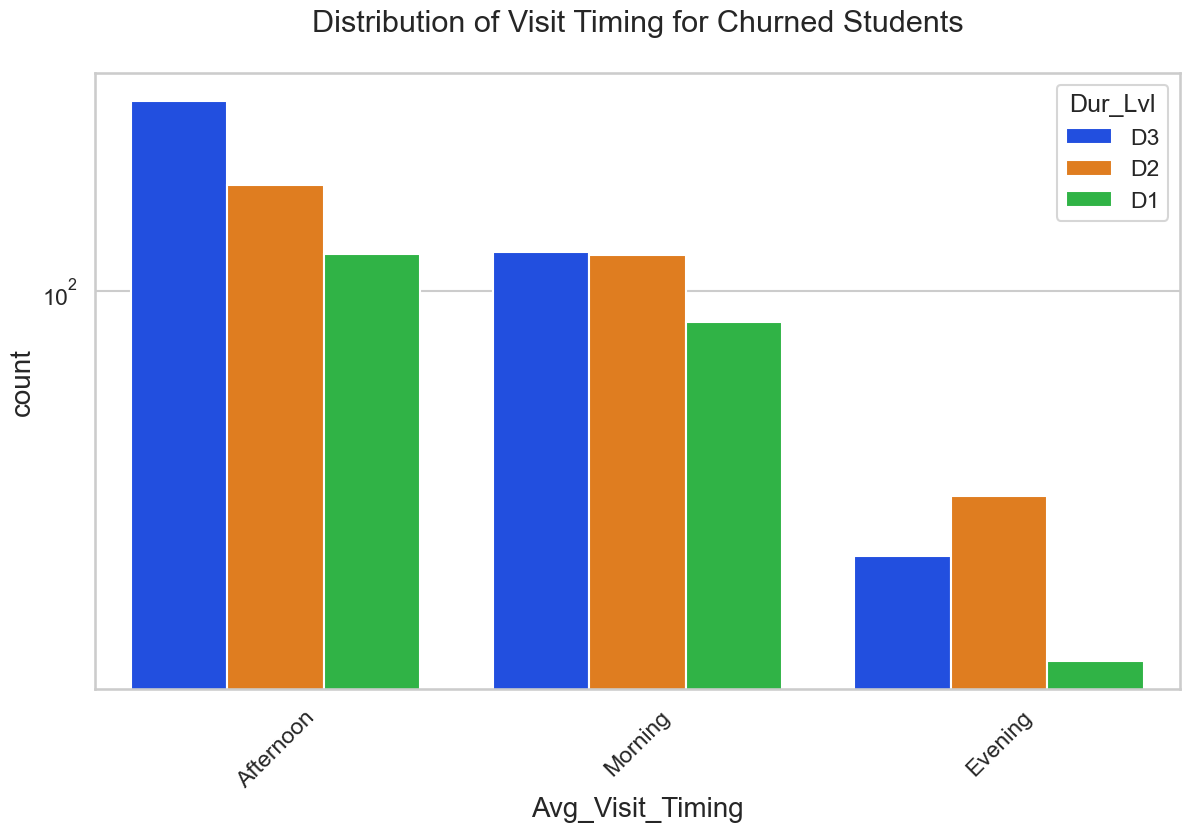

In [29]:
# Bivariate churn analysis of Dur Lvl distribution WRT Num Ser Usd

ChurnPlot(df1_target1,col='Avg_Visit_Timing',title='Distribution of Visit Timing for Churned Students',hue='Dur_Lvl')

Univariate analysis revealed that duration level D3 churned the least; however, when considering 
duration with respect to visiting timing level D1 sees the least churn across all visit timing categories      

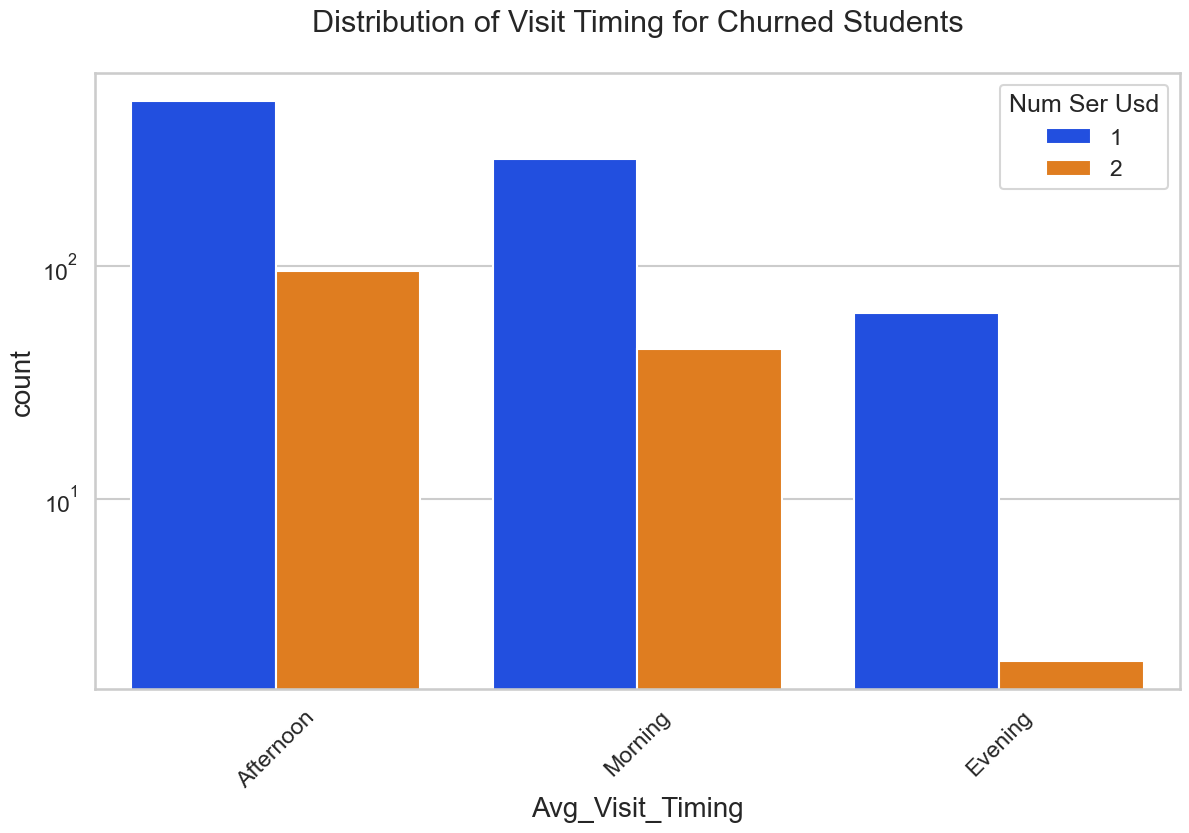

In [30]:
# Bivariate churn analysis of Avg_Visit_Timing distribution WRT Num Ser Usd

ChurnPlot(df1_target1,col='Avg_Visit_Timing',title='Distribution of Visit Timing for Churned Students',hue='Num Ser Usd')

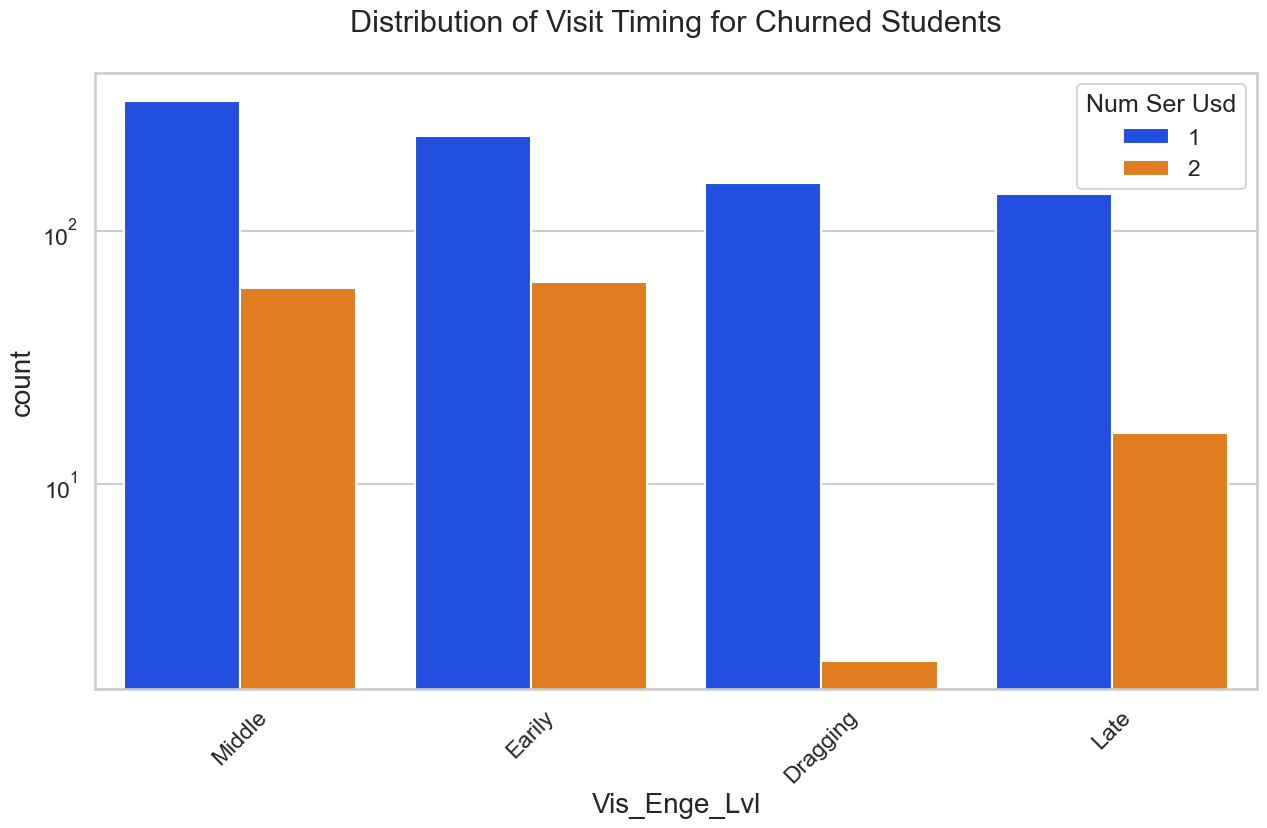

In [31]:
# Bivariate churn analysis of Vis_Enge_Lvl distribution WRT Num Ser Usd

ChurnPlot(df1_target1,col='Vis_Enge_Lvl',title='Distribution of Visit Timing for Churned Students',hue='Num Ser Usd')

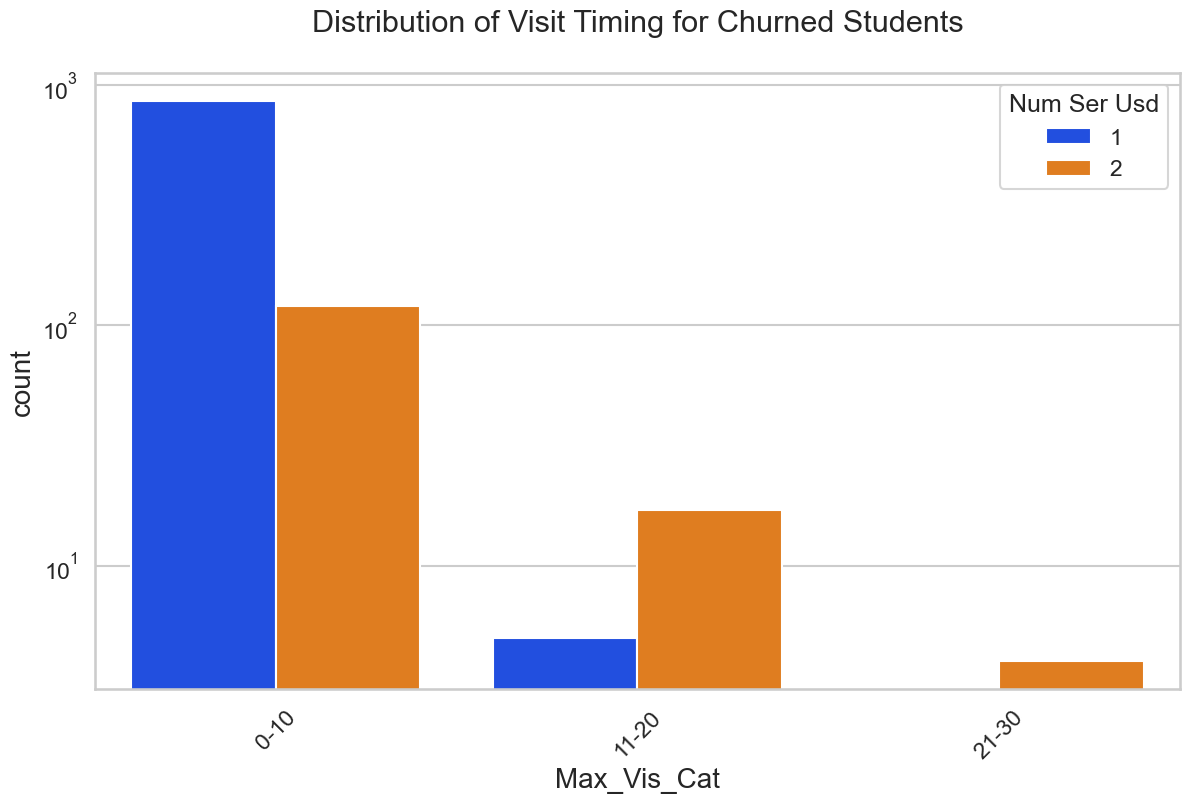

In [32]:
# Bivariate churn analysis of Max_Vis_Cat distribution WRT Num Ser Usd

ChurnPlot(df1_target1,col='Max_Vis_Cat',title='Distribution of Visit Timing for Churned Students',hue='Num Ser Usd')

Consistent with univariate analysis, those who engaged with both of the center’s services are, on average, less likely to churn

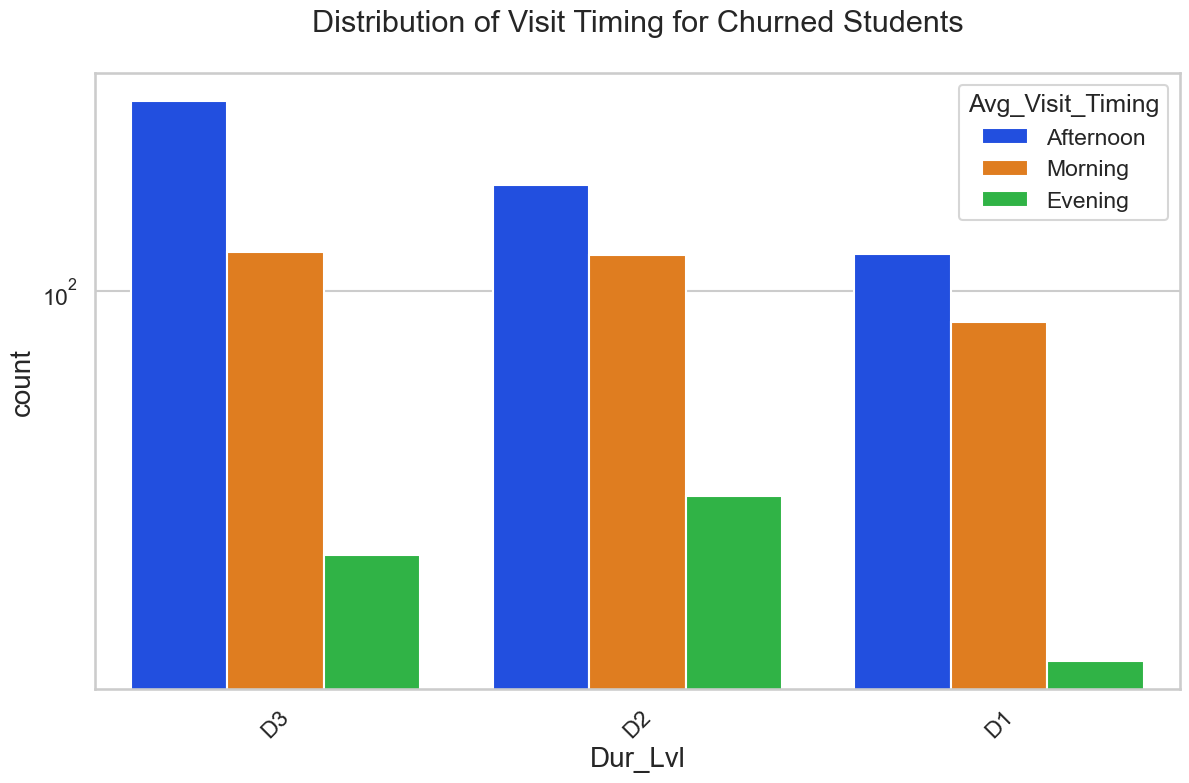

In [33]:
# Bivariate churn analysis of Dur_Lvl distribution WRT Avg_Visit_Timing

ChurnPlot(df1_target1,col='Dur_Lvl',title='Distribution of Visit Timing for Churned Students',hue='Avg_Visit_Timing')

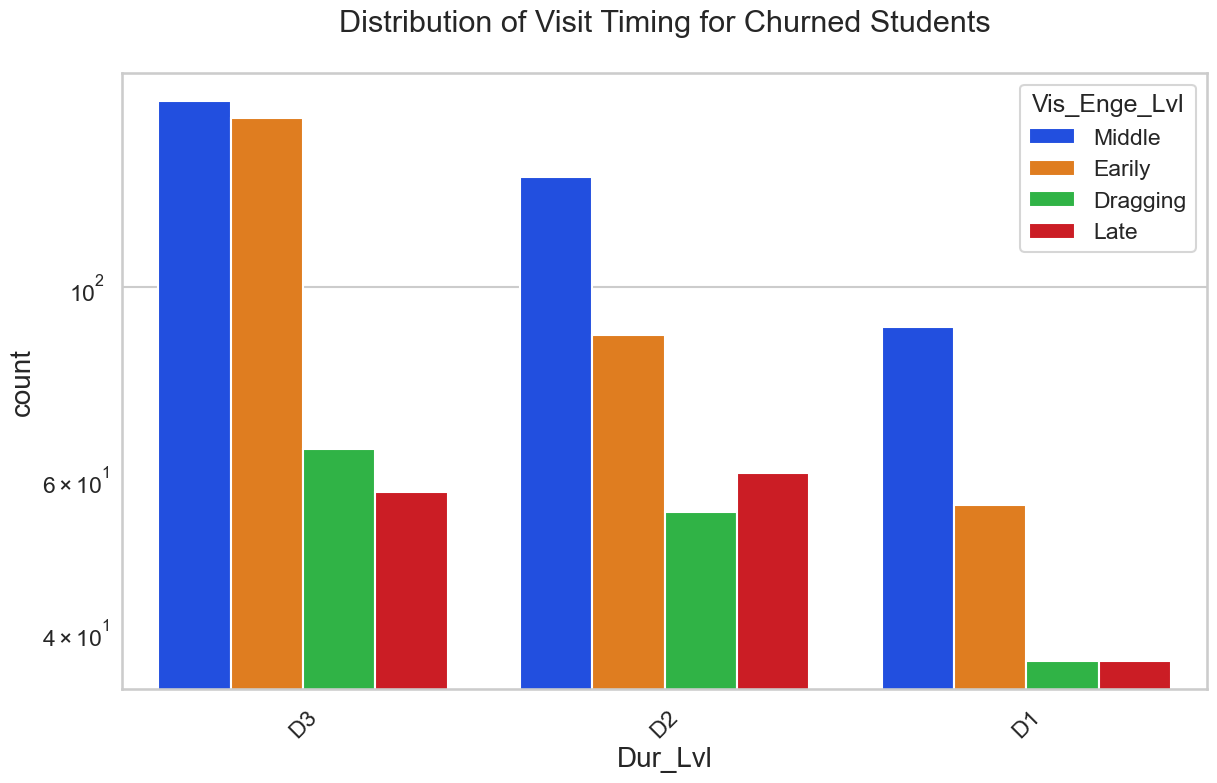

In [34]:
# Bivariate churn analysis of Dur_Lvl distribution WRT Vis_Enge_Lvl

ChurnPlot(df1_target1,col='Dur_Lvl',title='Distribution of Visit Timing for Churned Students',hue='Vis_Enge_Lvl')

Middle engagement sees higher churn across all duration levels

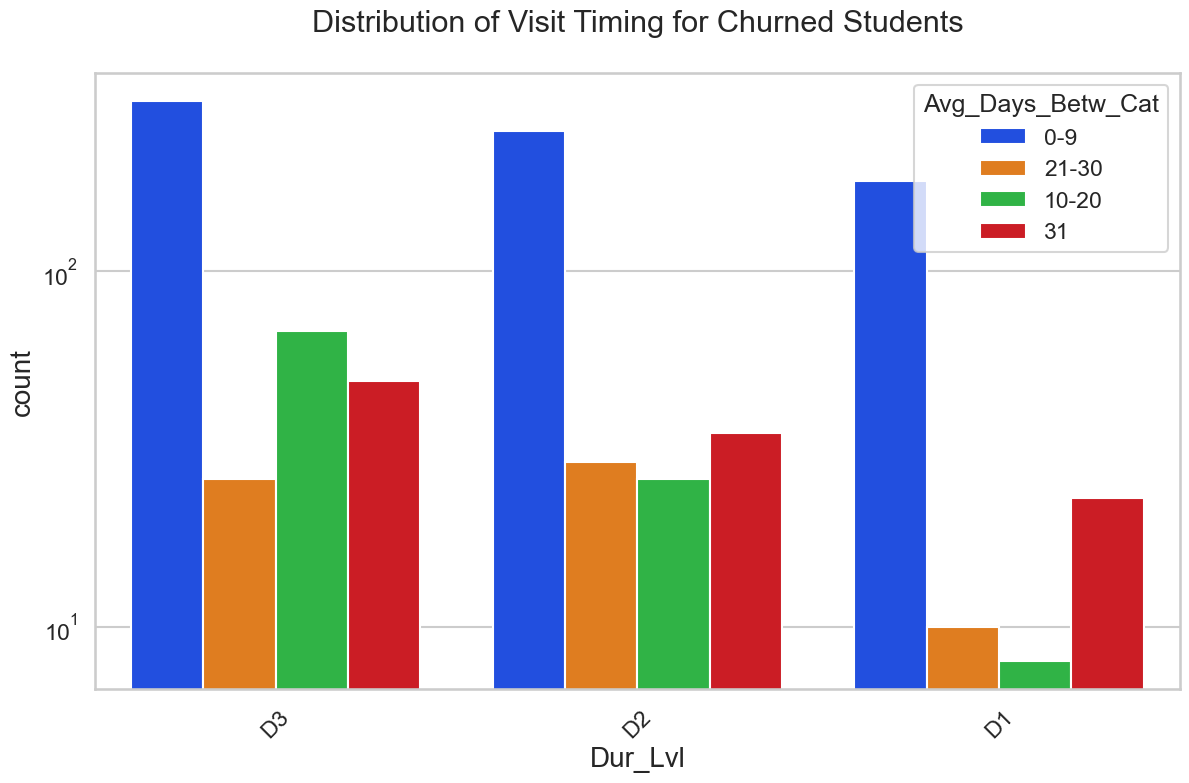

In [35]:
# Bivariate churn analysis of Dur_Lvl distribution WRT Avg_Days_Betw_Cat

ChurnPlot(df1_target1,col='Dur_Lvl',title='Distribution of Visit Timing for Churned Students',hue='Avg_Days_Betw_Cat')

0-9 days in between has the highest churn rates, however this category also includes many that only visited once. D1 overall has the lowest churn rate, but also notice that 10-20 days in between visits have a steadily decreasing churn rate across all duration categories. 

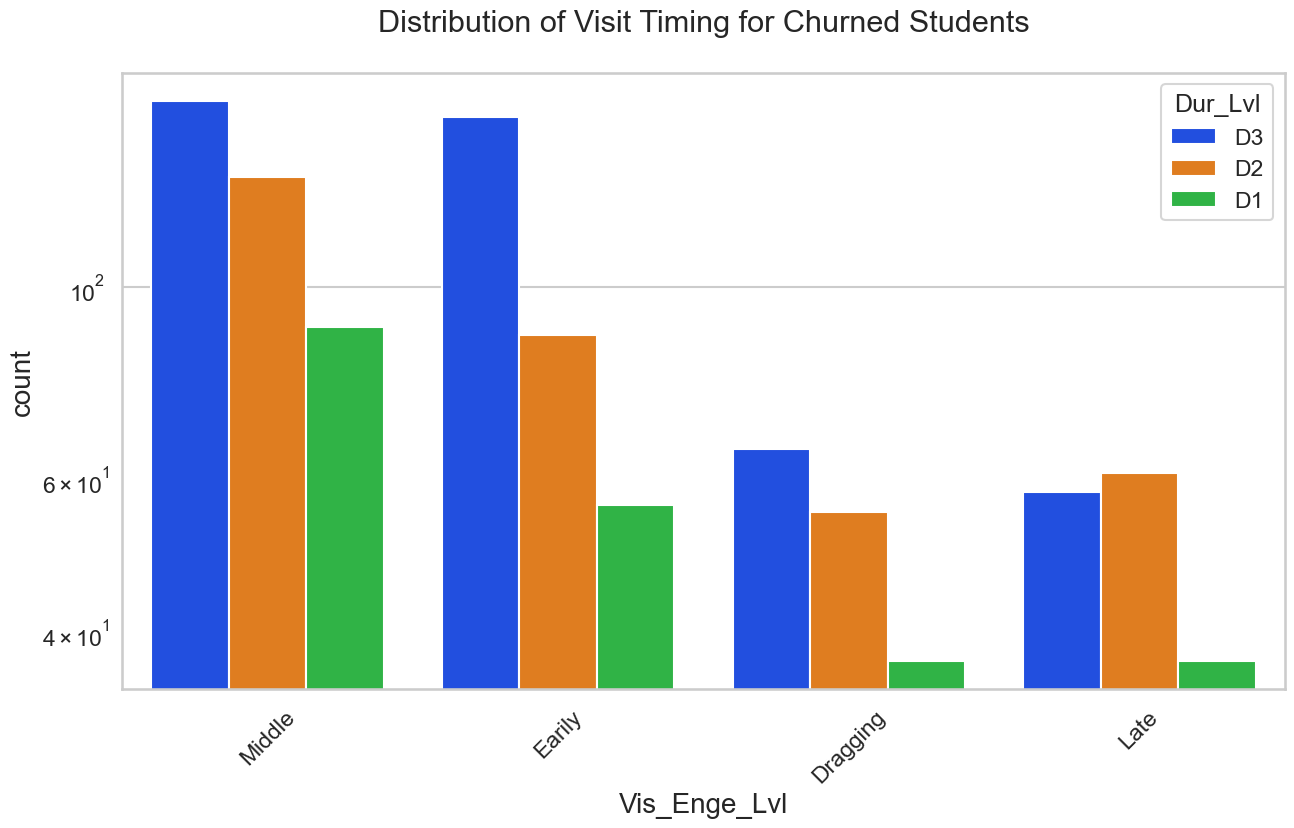

In [36]:
# Bivariate churn analysis of Dur_Lvl distribution WRT Vis_Enge_Lvl

ChurnPlot(df1_target1,col='Vis_Enge_Lvl',title='Distribution of Visit Timing for Churned Students',hue='Dur_Lvl')

When considering visit engagement throughout the semester, D2 (30-59 min) and D1 (>30 min) duration categories have, on average, better churn outcomes than compared to D3 which are visits over an hour.  

In [37]:
# Exporing dummies dataset for model building

F19_Data_dummies.to_csv('F19_churn.csv')

# Model Building

In [71]:
# Importing relevent libraries 

import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [72]:
# df is a simplified alias for F19_churn

df=pd.read_csv("F19_churn.csv")
df

,Unnamed: 0,Churn,Num Ser Usd,Tut_Vis_Cnt,Stdy_Vis_Cnt,MAX VIS CNT,Dur_Lvl_D1,Dur_Lvl_D2,Dur_Lvl_D3,Vis_Enge_Lvl_Dragging,...,Max_Vis_Cat_51+,Sng_Ser_User_No,Sng_Ser_User_Yes,Avg_Days_Betw_Cat_0-9,Avg_Days_Betw_Cat_10-20,Avg_Days_Betw_Cat_21-30,Avg_Days_Betw_Cat_31,Avg_Visit_Timing_Afternoon,Avg_Visit_Timing_Evening,Avg_Visit_Timing_Morning
0,0,1,1,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,1,0,1,0,7,7,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
2,2,0,1,0,5,5,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,3,0,2,2,7,9,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,4,0,1,0,2,2,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [73]:
df = df.drop('Unnamed: 0',axis=1)

In [75]:
# Creation of x df, being all of the features other than the target var churn

x=df.drop('Churn',axis=1)
x

,Num Ser Usd,Tut_Vis_Cnt,Stdy_Vis_Cnt,MAX VIS CNT,Dur_Lvl_D1,Dur_Lvl_D2,Dur_Lvl_D3,Vis_Enge_Lvl_Dragging,Vis_Enge_Lvl_Earily,Vis_Enge_Lvl_Late,...,Max_Vis_Cat_51+,Sng_Ser_User_No,Sng_Ser_User_Yes,Avg_Days_Betw_Cat_0-9,Avg_Days_Betw_Cat_10-20,Avg_Days_Betw_Cat_21-30,Avg_Days_Betw_Cat_31,Avg_Visit_Timing_Afternoon,Avg_Visit_Timing_Evening,Avg_Visit_Timing_Morning
0,1,0,1,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,1,0,7,7,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,1,0,5,5,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,2,2,7,9,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,1,0,2,2,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,1,1,0,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2136,1,1,0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2137,2,6,3,9,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2138,1,2,0,2,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [76]:
# Creating y var, being target variable churn

y=df['Churn']
y

0       1
1       0
2       0
3       0
4       0
       ..
2135    1
2136    1
2137    0
2138    0
2139    0
Name: Churn, Length: 2140, dtype: int64

In [77]:
# Separating data into training and test data sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Decision Tree Classifier model building

In [78]:
#  Creating model for classification purposes using scikit learn DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [79]:
# Training model_dt using training data x and y and fit funciton

model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [80]:
# Predicting y values based on fitted model and reserved x_test data values

y_pred=model_dt.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [81]:
# Model scored to calculate R-squared value based on testing values

model_dt.score(x_test,y_test)

0.9322429906542056

In [82]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       226
           1       0.97      0.89      0.93       202

    accuracy                           0.93       428
   macro avg       0.94      0.93      0.93       428
weighted avg       0.93      0.93      0.93       428



Model accuracy in predicting churn outcome is fairly accurate, specifically the R-squared value is above 90% accuracy which is well within accuracy for prediction utility 

In [85]:
print(metrics.confusion_matrix(y_test, y_pred))

[[220   6]
 [ 23 179]]


Random Forest Classifier model building

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [88]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [89]:
y_pred=model_rf.predict(x_test)

In [90]:
model_rf.score(x_test,y_test)

0.9299065420560748

In [91]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       226
           1       0.97      0.88      0.92       202

    accuracy                           0.93       428
   macro avg       0.93      0.93      0.93       428
weighted avg       0.93      0.93      0.93       428



Random Forest Classifier model was used for accuracy comparison purposes, yet accuracy is slightly lower when using this model

Pickling model to save for later deployment

In [92]:
import pickle

In [93]:
filename = 'model.sav'

In [94]:
pickle.dump(model_dt, open(filename, 'wb'))